# Tree-Based Models (CARTs)

### Definitions
- **Decision-Tree**: data structure consisting of a hierarchy of nodes. 
- **Node**: question or prediction. 
    - Root (initial question)
    - Internal node (questions)
    - Leaf (predictions)
- **Criterions**: Used to find impurity of leafs and decide the order of the tree. 
    - **gini index**
    - **entropy**

### Types
- **Decision tree for classification**
    - Sequence of if-else questions about individual features with the goal of infer class labels. 
    - Able to capture non-linear relationships between features and labels.
    - Don't require feature scaling (i.e. Standardization...)
    - Hyperparameters:
        - max_depth
        - criterion
    - **note**: remember to stratify unbalanced data so that we have the same proportions in the samples as in the population.
- **Decision tree for regression**
    - Hypterparameters:
        - min_samples_leaf: The minimum number of samples required to be at a leaf node. ***This may have the effect of smoothing the model.***


### Advantages & limitations
**Advantages**
- Simple to understand
- Easy to use
- Flexibility: ability to describe non-linear dependencies. 
- No need to standardize or normalize features

**Limitations**
- Classification: can only produce orthogonal decision boundaries
- Sensitive to small variations in the training set
- High variance: unconstrained CARTs may overfit the training set
    - Solution: ensemble learning

In [1]:
### Init notebook
import warnings
warnings.filterwarnings('ignore')

### Decision tree for classification

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X = data.data[:, :2]
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Instantiate the model
dt = DecisionTreeClassifier(max_depth=4, random_state=1)

# Fit the model with the training data
dt.fit(X_train, y_train)

# Predict the test
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is: {accuracy}")


The accuracy of the model is: 0.9122807017543859


### Visualize and compare

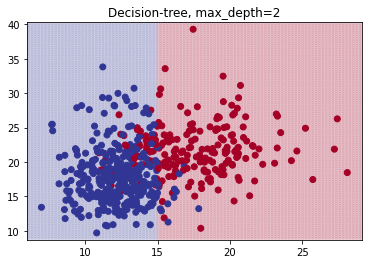

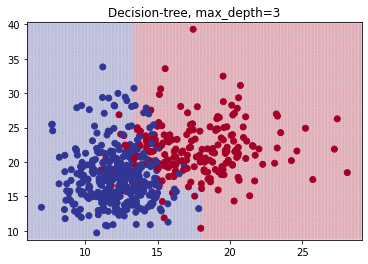

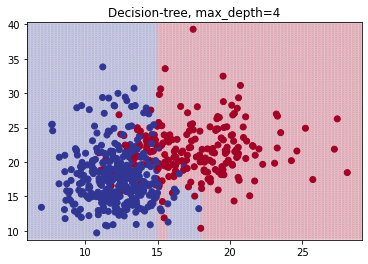

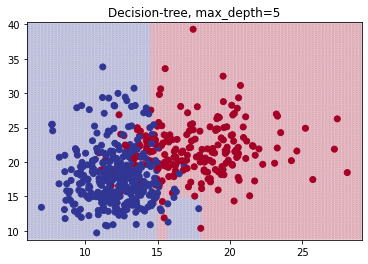

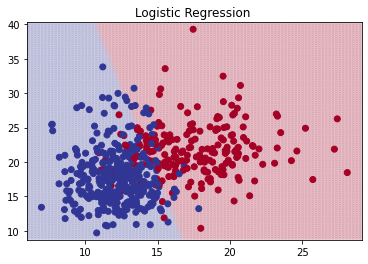

In [3]:
# Compare decision tree with logistic regression
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundaries(feature_1, feature_2, ml_model, title):
    # Create 100 quidistant points in both x and y
    x_min, x_max = feature_1.min() - 1, feature_1.max() + 1
    y_min, y_max = feature_2.min() - 1, feature_2.max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
        )

    # Obtain the predicted value for each point
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred_mesh = ml_model.predict(x_in)
    y_pred_mesh = np.round(y_pred_mesh).reshape(xx.shape)

    # Plot
    color = plt.cm.RdYlBu
    plt.scatter(xx, yy, c=y_pred_mesh, cmap=color, alpha=0.05)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=color)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

for max_depth in range(2, 6, 1):
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    dt.fit(X_train, y_train)
    plot_decision_boundaries(feature_1=X[:, 0], feature_2=X[:, 1], ml_model=dt, title=f'Decision-tree, max_depth={max_depth}')


### Compare against Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)
plot_decision_boundaries(feature_1=X[:, 0], feature_2=X[:, 1], ml_model=logreg, title=f'Logistic Regression ')

### Decision tree for regression

/Users/sebastian/.virtualenvs/aphrodite/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


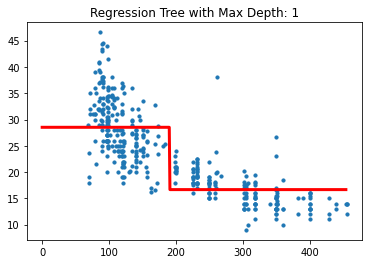

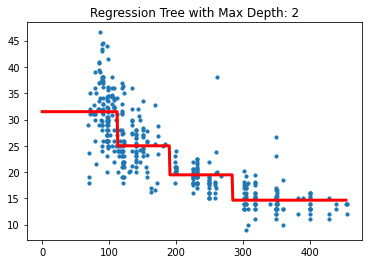

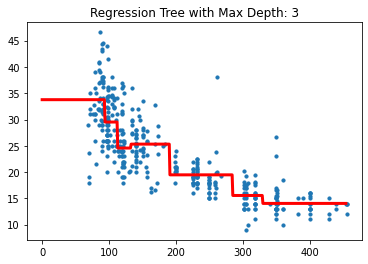

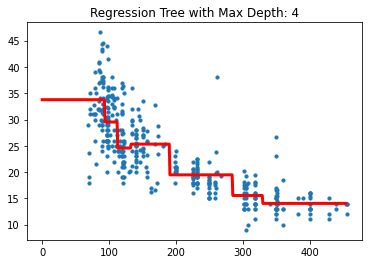

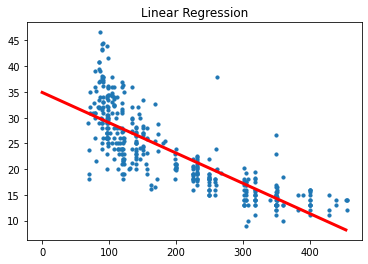

In [2]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

# Import data
file1 = 'https://raw.githubusercontent.com/prince381/car_mpg_predict/master/cars1.csv'
file2 = 'https://raw.githubusercontent.com/prince381/car_mpg_predict/master/cars2.csv'
cars1 = pd.read_csv(file1).dropna(how='all', axis=1)
cars2 = pd.read_csv(file2)  
df = pd.concat([cars1, cars2], ignore_index=True, sort=False)

# Split data
X = df['displacement'].to_numpy().reshape(-1, 1)
y = df['mpg'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Instantiate model with different hyperparameters and compare
X_plot = np.arange(0, df['displacement'].max(), 1).reshape(-1, 1)
for max_depth in range(1, 5):
    dt = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=0.1, random_state=3)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    mse_dt = MSE(y_test, y_pred)
    rmse_dt = mse_dt**(1/2)

    # Plot results
    y_plot = dt.predict(X_plot)
    plt.scatter(X, y, s=10)
    plt.plot(X_plot, y_plot, c='red', linewidth=3)
    plt.title(f'Regression Tree with Max Depth: {max_depth}')
    plt.show()

    # print(f"Max Depth: {max_depth}, RMSE: {rmse_dt}")

# Linear regression comparison
lm = LinearRegression()
lm.fit(X_train, y_train)
y_plot = lm.predict(X_plot)
plt.scatter(X, y, s=10)
plt.plot(X_plot, y_plot, c='red', linewidth=3)
plt.title('Linear Regression')
plt.show()